# House Price Prediction Using Linear Regression

## **Project Overview**
This project aims to develop a machine learning model to predict the prices of residential houses based on:
- **Square footage**
- **Number of bedrooms**
- **Number of bathrooms**

The model leverages linear regression techniques to explore the relationship between these features and house prices, providing accurate and interpretable predictions. The dataset is sourced from the Kaggle competition **[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)**.

---

## **Objective**
- Predict house prices (`SalePrice`) using linear regression.
- Understand the importance and influence of specific house attributes on their market value.
- Build a robust and reliable model evaluated using the **Root Mean Squared Logarithmic Error (RMSLE)**.

---

## **Dataset Description**
The dataset includes 79 explanatory variables describing residential properties in Ames, Iowa. For this project:
- Training data contains house prices (`SalePrice`) and feature details.
- Testing data lacks `SalePrice` but includes all feature details for predictions.

Key columns of interest include:
- **GrLivArea**: Above-grade (ground) living area in square feet.
- **BedroomAbvGr**: Number of bedrooms above ground level.
- **FullBath & HalfBath**: Number of full and half bathrooms.

---

## **Approach**

### **1. Data Preparation**
- **Data Cleaning**: Address missing values, remove anomalies, and handle inconsistencies.
- **Feature Selection**:
  - Focus on relevant predictors: `GrLivArea`, `BedroomAbvGr`, and a new feature `TotalBathrooms`.
  - Reduce dimensionality for simplicity.
- **Feature Engineering**:
  - Combine features such as `FullBath` and `HalfBath` to create `TotalBathrooms`.
  - Apply log transformation to normalize skewed variables like `SalePrice`.

### **2. Exploratory Data Analysis (EDA)**
- Analyze distributions of `SalePrice` and key predictors using histograms.
- Visualize relationships with scatter plots.
- Correlation analysis using heatmaps to identify dependencies and multicollinearity.

### **3. Model Development**
- **Linear Regression**: Build a baseline model to capture feature relationships.
- **Regularization**: Introduce Ridge or Lasso regression to improve performance and generalization.
- Split data into training (80%) and validating (20%) subsets.

### **4. Evaluation**
- Evaluate the model using:
  - **RMSLE**: For leaderboard compatibility.
  - Complementary metrics like R-squared and Mean Absolute Error (MAE).
- Perform k-fold cross-validation to ensure robustness.

### **5. Optimization**
- Fine-tune model hyperparameters using grid search.
- Experiment with scaling techniques if necessary.

---

## **Tools and Libraries**
- **Python**
  - Libraries: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- **Environment**: Google Colab
- **Model Persistence**: `pickle` or `joblib`

---

## **Expected Outcomes**
- A linear regression model capable of accurately predicting house prices.
- Insights into the most impactful features influencing residential property values.

---

## **Author**
- **[Daniel Fodi Nyabade]**: Machine Learning Intern, Prodigy InfoTech



In [38]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the Dataset
train_data = pd.read_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_prediction_project/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_prediction_project/test.csv")

## Data Preparation

In [40]:
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
test_data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave   NaN      Reg   
1   1462          20       RL         81.0    14267   Pave   NaN      IR1   
2   1463          60       RL         74.0    13830   Pave   NaN      IR1   
3   1464          60       RL         78.0     9978   Pave   NaN      IR1   
4   1465         120       RL         43.0     5005   Pave   NaN      IR1   
5   1466          60       RL         75.0    10000   Pave   NaN      IR1   
6   1467          20       RL          NaN     7980   Pave   NaN      IR1   
7   1468          60       RL         63.0     8402   Pave   NaN      IR1   
8   1469          20       RL         85.0    10176   Pave   NaN      Reg   
9   1470          20       RL         70.0     8400   Pave   NaN      Reg   
10  1471         120       RH         26.0     5858   Pave   NaN      IR1   
11  1472         160       RM         21.0     1680   Pave   NaN      Reg   
12  1473         160       RM         21.0     1680   Pave   NaN      Reg   
13  1474         160       RL         24.0     2280   Pave   NaN      Reg   
14  1475         120       RL         24.0     2280   Pave   NaN      Reg   
15  1476          60       RL        102.0    12858   Pave   NaN      IR1   
16  1477          20       RL         94.0    12883   Pave   NaN      IR1   
17  1478          20       RL         90.0    11520   Pave   NaN      Reg   
18  1479          20       RL         79.0    14122   Pave   NaN      IR1   
19  1480          20       RL        110.0    14300   Pave   NaN      Reg   
20  1481          60       RL        105.0    13650   Pave   NaN      Reg   
21  1482         120       RL         41.0     7132   Pave   NaN      IR1   
22  1483          20       RL        100.0    18494   Pave   NaN      IR1   
23  1484         120       RL         43.0     3203   Pave   NaN      Reg   
24  1485          80       RL         67.0    13300   Pave   NaN      IR1   
25  1486          60       RL         63.0     8577   Pave   NaN      IR1   
26  1487          60       RL         60.0    17433   Pave   NaN      IR2   
27  1488          20       RL         73.0     8987   Pave   NaN      Reg   
28  1489          20       FV         92.0     9215   Pave   NaN      Reg   
29  1490          20       FV         84.0    10440   Pave   NaN      Reg   
30  1491          60       RL         70.0    11920   Pave   NaN      Reg   
31  1492          30       RH         70.0     9800   Pave   NaN      Reg   
32  1493          20       RL         39.0    15410   Pave   NaN      IR1   
33  1494          60       RL         85.0    13143   Pave   NaN      IR1   
34  1495          60       RL         88.0    11134   Pave   NaN      Reg   
35  1496         120       FV         25.0     4835   Pave   NaN      IR1   
36  1497         160       FV         39.0     3515   Pave  Pave      Reg   
37  1498         160       FV         30.0     3215   Pave  Pave      Reg   
38  1499         160       FV         24.0     2544   Pave  Pave      Reg   
39  1500         160       FV         24.0     2544   Pave  Pave      Reg   
40  1501         160       FV          NaN     2980   Pave   NaN      Reg   
41  1502         160       FV          NaN     2403   Pave   NaN      IR1   
42  1503          20       FV         57.0    12853   Pave  Pave      IR1   
43  1504          60       FV         68.0     7379   Pave   NaN      IR1   
44  1505          20       FV         80.0     8000   Pave   NaN      Reg   
45  1506          20       RL          NaN    10456   Pave   NaN      IR1   
46  1507          60       RL         80.0    10791   Pave   NaN      Reg   
47  1508          50       RL          NaN    18837   Pave   NaN      IR1   
48  1509          60       RL         80.0     9600   Pave   NaN      Reg   
49  1510          20       RL         80.0     9600   Pave   NaN      Reg   

   LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  

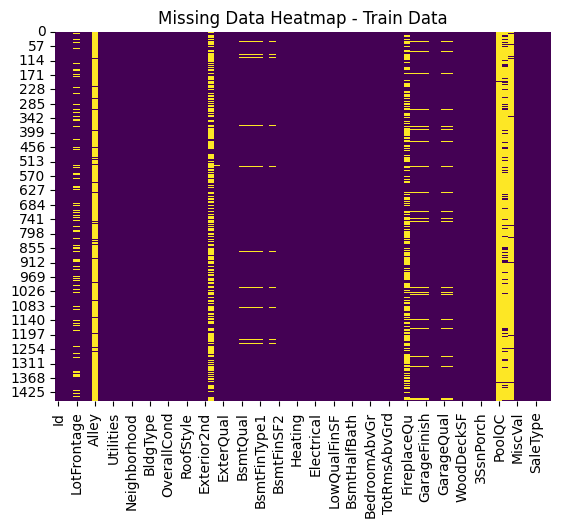

In [43]:
# Handle Missing Values
# Visualizing Missing Data
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap - Train Data")
plt.show()

In [44]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [45]:
train_data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL          NaN     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL          NaN     9180   Pave   NaN      IR1   
43  44          20       RL          NaN     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  

In [46]:
# Numerical Features: Fill with Median
numerical_features = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
for feature in numerical_features:
  train_data[feature] = train_data[feature].fillna(train_data[feature].median())
  test_data[feature] = test_data[feature].fillna(test_data[feature].median())


# Categorical Features: Fill with Mode
categorical_features = ["Electrical", "Exterior1st", "Exterior2nd", "SaleType"]
for feature in categorical_features:
    # Check if mode is not empty before accessing element 0
    mode_values = train_data[feature].mode()
    if not mode_values.empty:
        train_data[feature] = train_data[feature].fillna(mode_values[0])
        test_data[feature] = test_data[feature].fillna(mode_values[0])
    else:
        # Handle the case where mode is empty (e.g., fill with a default value)
        print(f"Warning: Column '{feature}' has no mode. Filling with 'Missing'.")
        train_data[feature] = train_data[feature].fillna('Missing')
        test_data[feature] = test_data[feature].fillna('Missing')


In [47]:
# Handle excessive missing values (threshold: 50% missing)
threshold = 0.5
missing_percentage = train_data.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [48]:
#train_data.set_index('Id', inplace=True)
#test_data.set_index('Id', inplace=True)

In [49]:
train_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   
7   8          60       RL         69.0    10382   Pave      IR1         Lvl   
8   9          50       RM         51.0     6120   Pave      Reg         Lvl   
9  10         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   
5    AllPub    Inside  ...             0       320           0        0   
6    AllPub    Inside  ...             0         0           0        0   
7    AllPub    Corner  ...           228         0           0        0   
8    AllPub    Inside  ...           205         0           0        0   
9    AllPub    Corner  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  
5     700     10    2009        WD         Normal     143000  
6       0      8    2007        WD         Normal     307000  
7     350     11    2009        WD         Normal     200000  
8       0      4    2008        WD        Abnorml     129900  
9       0      1    2008        WD         Normal     118000  

[10 rows x 76 columns]

In [50]:
test_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   
5  1466          60       RL         75.0    10000   Pave      IR1   
6  1467          20       RL         67.0     7980   Pave      IR1   
7  1468          60       RL         63.0     8402   Pave      IR1   
8  1469          20       RL         85.0    10176   Pave      Reg   
9  1470          20       RL         70.0     8400   Pave      Reg   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    AllPub    Inside  ...           0             0         0   
1         Lvl    AllPub    Corner  ...          36             0         0   
2         Lvl    AllPub    Inside  ...          34             0         0   
3         Lvl    AllPub    Inside  ...          36             0         0   
4         HLS    AllPub    Inside  ...          82             0         0   
5         Lvl    AllPub    Corner  ...          84             0         0   
6         Lvl    AllPub    Inside  ...          21             0         0   
7         Lvl    AllPub    Inside  ...          75             0         0   
8         Lvl    AllPub    Inside  ...           0             0         0   
9         Lvl    AllPub    Corner  ...           0             0         0   

  ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         120        0       0       6    2010        WD         Normal  
1           0        0   12500       6    2010        WD         Normal  
2           0        0       0       3    2010        WD         Normal  
3           0        0       0       6    2010        WD         Normal  
4         144        0       0       1    2010        WD         Normal  
5           0        0       0       4    2010        WD         Normal  
6           0        0     500       3    2010        WD         Normal  
7           0        0       0       5    2010        WD         Normal  
8           0        0       0       2    2010        WD         Normal  
9           0        0       0       4    2010        WD         Normal  

[10 rows x 75 columns]

### **Feature engineering:**
is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. It's a crucial step in machine learning, as the quality of your features directly impacts the performance of your model.

<ipython-input-51-e5d853736312>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.24769912 12.10901644 12.31717117 ... 12.49313327 11.86446927
 11.90159023]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[:, "SalePrice"] = np.log1p(train_data["SalePrice"])


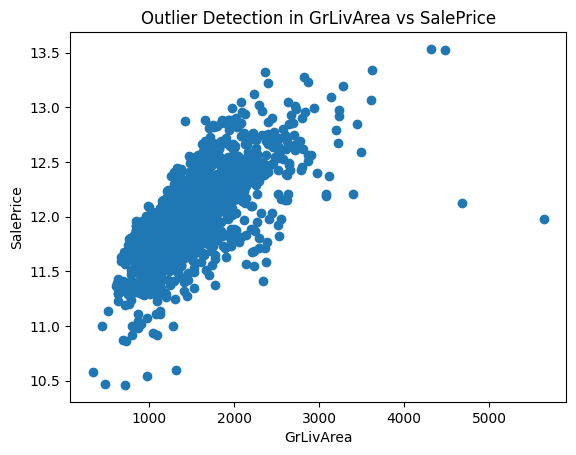

In [51]:
# Feature Engineering

# Log-transform the Target Variable
train_data.loc[:, "SalePrice"] = np.log1p(train_data["SalePrice"])

# Combine Bathrooms Features
train_data.loc[:, "TotalBathrooms"] = train_data["FullBath"] + 0.5 * train_data["HalfBath"]
test_data.loc[:, "TotalBathrooms"] = test_data["FullBath"] + 0.5 * test_data["HalfBath"]

# Feature: Total Rooms
train_data.loc[:, "TotalRooms"] = train_data["TotRmsAbvGrd"] + train_data["BedroomAbvGr"]
test_data.loc[:, "TotalRooms"] = test_data["TotRmsAbvGrd"] + test_data["BedroomAbvGr"]

# Feature: Age of House
train_data.loc[:, "HouseAge"] = train_data["YrSold"] - train_data["YearBuilt"]
test_data.loc[:, "HouseAge"] = test_data["YrSold"] - test_data["YearBuilt"]

# Feature: Garage Quality (binary: presence or absence of a garage)
train_data.loc[:, "HasGarage"] = train_data["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
test_data.loc[:, "HasGarage"] = test_data["GarageArea"].apply(lambda x: 1 if x > 0 else 0)

# Scaling Numerical Features
scaler = StandardScaler()
scaled_features = ["GrLivArea", "TotalBathrooms", "TotalRooms", "HouseAge"]
for feature in scaled_features:
    train_data.loc[:, f"{feature}_scaled"] = scaler.fit_transform(train_data[[feature]])
    test_data.loc[:, f"{feature}_scaled"] = scaler.transform(test_data[[feature]])

# Remove Outliers
plt.scatter(train_data["GrLivArea"], train_data["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Outlier Detection in GrLivArea vs SalePrice")
plt.show()

# Removing Outliers
train_data = train_data[train_data["GrLivArea"] < 4500].copy()

## Feature Selection

In [52]:
# Additional Preprocessing Logic for Scaling and Encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Update selected features with new ones
selected_features = [
    "GrLivArea",  # Square footage
    "BedroomAbvGr",  # Number of bedrooms
    "TotalBathrooms",  # Combined full and half bathrooms
    "LotArea",  # Lot size
    "YearBuilt",  # Year built
    "GarageCars",  # Garage capacity
    "Neighborhood"  # Location (categorical)
]

# Define numerical and categorical features
numerical_features = ["GrLivArea", "BedroomAbvGr", "TotalBathrooms", "LotArea", "YearBuilt", "GarageCars"]
categorical_features = ["Neighborhood"]

# Apply scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Scale numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)  # Encode categorical features
    ]
)

# Apply transformations to the dataset
X_train = train_data[selected_features]
X_test = test_data[selected_features]
y_train = train_data["SalePrice"]

In [53]:
test_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   
5  1466          60       RL         75.0    10000   Pave      IR1   
6  1467          20       RL         67.0     7980   Pave      IR1   
7  1468          60       RL         63.0     8402   Pave      IR1   
8  1469          20       RL         85.0    10176   Pave      Reg   
9  1470          20       RL         70.0     8400   Pave      Reg   

  LandContour Utilities LotConfig  ... SaleType SaleCondition TotalBathrooms  \
0         Lvl    AllPub    Inside  ...       WD        Normal            1.0   
1         Lvl    AllPub    Corner  ...       WD        Normal            1.5   
2         Lvl    AllPub    Inside  ...       WD        Normal            2.5   
3         Lvl    AllPub    Inside  ...       WD        Normal            2.5   
4         HLS    AllPub    Inside  ...       WD        Normal            2.0   
5         Lvl    AllPub    Corner  ...       WD        Normal            2.5   
6         Lvl    AllPub    Inside  ...       WD        Normal            2.0   
7         Lvl    AllPub    Inside  ...       WD        Normal            2.5   
8         Lvl    AllPub    Inside  ...       WD        Normal            1.5   
9         Lvl    AllPub    Corner  ...       WD        Normal            1.0   

  TotalRooms HouseAge HasGarage  GrLivArea_scaled  TotalBathrooms_scaled  \
0          7       49         1         -1.179256              -1.189855   
1          9       52         1         -0.354966              -0.403441   
2          9       13         1          0.216136               1.169387   
3         10       12         1          0.168544               1.169387   
4          7       18         1         -0.448246               0.382973   
5         10       17         1          0.265631               1.169387   
6          9       18         1         -0.625287               0.382973   
7         10       12         1         -0.096066               1.169387   
8          7       20         1         -0.332122              -0.403441   
9          6       40         1         -1.205908              -1.189855   

   TotalRooms_scaled  HouseAge_scaled  
0          -1.055944         0.411777  
1          -0.170177         0.510984  
2          -0.170177        -0.778707  
3           0.272707        -0.811776  
4          -1.055944        -0.613362  
5           0.272707        -0.646431  
6          -0.170177        -0.613362  
7           0.272707        -0.811776  
8          -1.055944        -0.547224  
9          -1.498827         0.114156  

[10 rows x 83 columns]

In [54]:
# split data for model training
features = [
    "GrLivArea_scaled",
    "BedroomAbvGr",
    "TotalBathrooms_scaled",
    "TotalRooms_scaled",
    "HouseAge_scaled",
    "HasGarage"
]

X = train_data[features]
y = train_data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save processed data
train_data.to_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_prediction_project/processed_train_data.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_prediction_project/processed_test_data.csv", index=False)

In [55]:
pd.read_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_prediction_project/processed_train_data.csv")

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1453  1456          60       RL         62.0     7917   Pave      Reg   
1454  1457          20       RL         85.0    13175   Pave      Reg   
1455  1458          70       RL         66.0     9042   Pave      Reg   
1456  1459          20       RL         68.0     9717   Pave      Reg   
1457  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... SaleCondition  SalePrice  \
0            Lvl    AllPub    Inside  ...        Normal  12.247699   
1            Lvl    AllPub       FR2  ...        Normal  12.109016   
2            Lvl    AllPub    Inside  ...        Normal  12.317171   
3            Lvl    AllPub    Corner  ...       Abnorml  11.849405   
4            Lvl    AllPub       FR2  ...        Normal  12.429220   
...          ...       ...       ...  ...           ...        ...   
1453         Lvl    AllPub    Inside  ...        Normal  12.072547   
1454         Lvl    AllPub    Inside  ...        Normal  12.254868   
1455         Lvl    AllPub    Inside  ...        Normal  12.493133   
1456         Lvl    AllPub    Inside  ...        Normal  11.864469   
1457         Lvl    AllPub    Inside  ...        Normal  11.901590   

     TotalBathrooms TotalRooms HouseAge HasGarage  GrLivArea_scaled  \
0               2.5         11        5         1          0.370333   
1               2.0          9       31         1         -0.482512   
2               2.5          9        7         1          0.515013   
3               1.0         10       91         1          0.383659   
4               2.5         13        8         1          1.299326   
...             ...        ...      ...       ...               ...   
1453            2.5         10        8         1          0.250402   
1454            2.0         10       32         1          1.061367   
1455            2.0         13       69         1          1.569647   
1456            1.0          7       60         1         -0.832788   
1457            1.5          9       43         1         -0.493934   

      TotalBathrooms_scaled  TotalRooms_scaled  HouseAge_scaled  
0                  1.169387           0.715591        -1.043259  
1                  0.382973          -0.170177        -0.183465  
2                  1.169387          -0.170177        -0.977121  
3                 -1.189855           0.272707         1.800676  
4                  1.169387           1.601358        -0.944052  
...                     ...                ...              ...  
1453               1.169387           0.272707        -0.944052  
1454               0.382973           0.272707        -0.150396  
1455               0.382973           1.601358         1.073157  
1456              -1.189855          -1.055944         0.775536  
1457              -0.403441          -0.170177         0.213363  

[1458 rows x 84 columns]

In [56]:
pd.read_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_prediction_project/processed_test_data.csv")

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... SaleType SaleCondition  \
0            Lvl    AllPub    Inside  ...       WD        Normal   
1            Lvl    AllPub    Corner  ...       WD        Normal   
2            Lvl    AllPub    Inside  ...       WD        Normal   
3            Lvl    AllPub    Inside  ...       WD        Normal   
4            HLS    AllPub    Inside  ...       WD        Normal   
...          ...       ...       ...  ...      ...           ...   
1454         Lvl    AllPub    Inside  ...       WD        Normal   
1455         Lvl    AllPub    Inside  ...       WD       Abnorml   
1456         Lvl    AllPub    Inside  ...       WD       Abnorml   
1457         Lvl    AllPub    Inside  ...       WD        Normal   
1458         Lvl    AllPub    Inside  ...       WD        Normal   

     TotalBathrooms TotalRooms HouseAge HasGarage  GrLivArea_scaled  \
0               1.0          7       49         1         -1.179256   
1               1.5          9       52         1         -0.354966   
2               2.5          9       13         1          0.216136   
3               2.5         10       12         1          0.168544   
4               2.0          7       18         1         -0.448246   
...             ...        ...      ...       ...               ...   
1454            1.5          8       36         0         -0.806136   
1455            1.5          9       36         1         -0.806136   
1456            1.0         11       46         1         -0.554851   
1457            1.0          9       14         0         -1.038384   
1458            2.5         12       13         1          0.922399   

      TotalBathrooms_scaled  TotalRooms_scaled  HouseAge_scaled  
0                 -1.189855          -1.055944         0.411777  
1                 -0.403441          -0.170177         0.510984  
2                  1.169387          -0.170177        -0.778707  
3                  1.169387           0.272707        -0.811776  
4                  0.382973          -1.055944        -0.613362  
...                     ...                ...              ...  
1454              -0.403441          -0.613060        -0.018120  
1455              -0.403441          -0.170177        -0.018120  
1456              -1.189855           0.715591         0.312570  
1457              -1.189855          -0.170177        -0.745638  
1458               1.169387           1.158474        -0.778707  

[1459 rows x 83 columns]

## Exploratory Data Analysis (EDA)

**The Exploratory Data Analysis (EDA)** phase aims to understand the dataset's structure, uncover relationships between features, and identify any patterns, anomalies, or insights that could influence your modeling decisions.

In [57]:
# Understand the Data
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1458 non-null   int64  
 1   MSSubClass             1458 non-null   int64  
 2   MSZoning               1458 non-null   object 
 3   LotFrontage            1458 non-null   float64
 4   LotArea                1458 non-null   int64  
 5   Street                 1458 non-null   object 
 6   LotShape               1458 non-null   object 
 7   LandContour            1458 non-null   object 
 8   Utilities              1458 non-null   object 
 9   LotConfig              1458 non-null   object 
 10  LandSlope              1458 non-null   object 
 11  Neighborhood           1458 non-null   object 
 12  Condition1             1458 non-null   object 
 13  Condition2             1458 non-null   object 
 14  BldgType               1458 non-null   object 
 15  HouseStyl

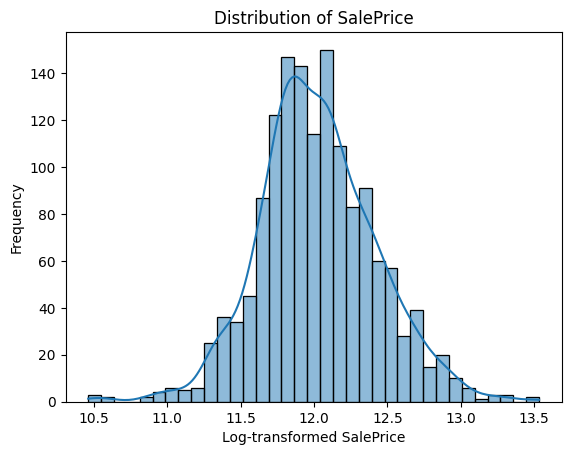

In [58]:
# Target Variable Distribution: Since we log-transformed SalePrice, let's visualize its distribution
sns.histplot(train_data["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("Log-transformed SalePrice")
plt.ylabel("Frequency")
plt.show()


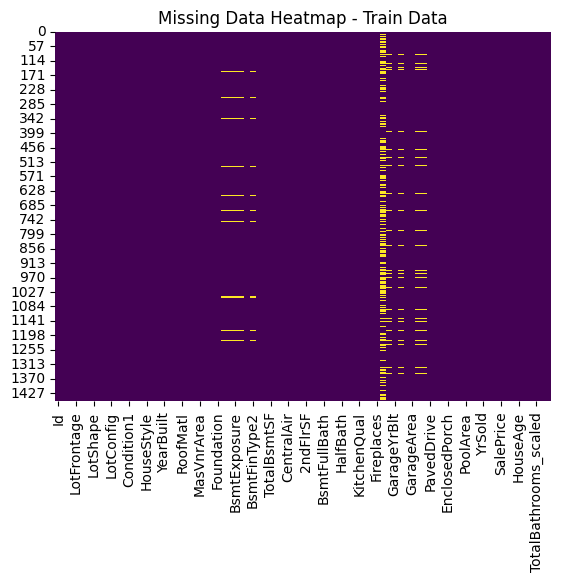

In [59]:
# Identify Missing Values (if any) by visualizing it
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap - Train Data")
plt.show()

In [60]:
# Calculate the percentage of missing values
missing_values = train_data.isnull().mean() * 100
print(missing_values[missing_values > 0])

BsmtQual         2.537723
BsmtCond         2.537723
BsmtExposure     2.606310
BsmtFinType1     2.537723
BsmtFinType2     2.606310
FireplaceQu     47.325103
GarageType       5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
dtype: float64


### Analyzing Numerical Features

* Let's use **Correlation Heatmap** to identify the relationships between numerical features.
* Also visualize important numerical features against `SalePrice` by using **Scatter Plots with Target Variable**

Correlation of numerical features with SalePrice:
SalePrice                1.000000
OverallQual              0.821405
GrLivArea_scaled         0.725211
GrLivArea                0.725211
GarageCars               0.681033
GarageArea               0.656129
TotalBsmtSF              0.647563
TotalBathrooms           0.640891
TotalBathrooms_scaled    0.640891
1stFlrSF                 0.620500
FullBath                 0.595899
YearBuilt                0.587043
YearRemodAdd             0.565992
TotRmsAbvGrd             0.537702
GarageYrBlt              0.496179
Fireplaces               0.491998
TotalRooms               0.461549
TotalRooms_scaled        0.461549
MasVnrArea               0.430570
BsmtFinSF1               0.392283
LotFrontage              0.351551
WoodDeckSF               0.334251
OpenPorchSF              0.325215
HasGarage                0.322994
2ndFlrSF                 0.319953
HalfBath                 0.314186
LotArea                  0.260544
BsmtFullBath             0.23709

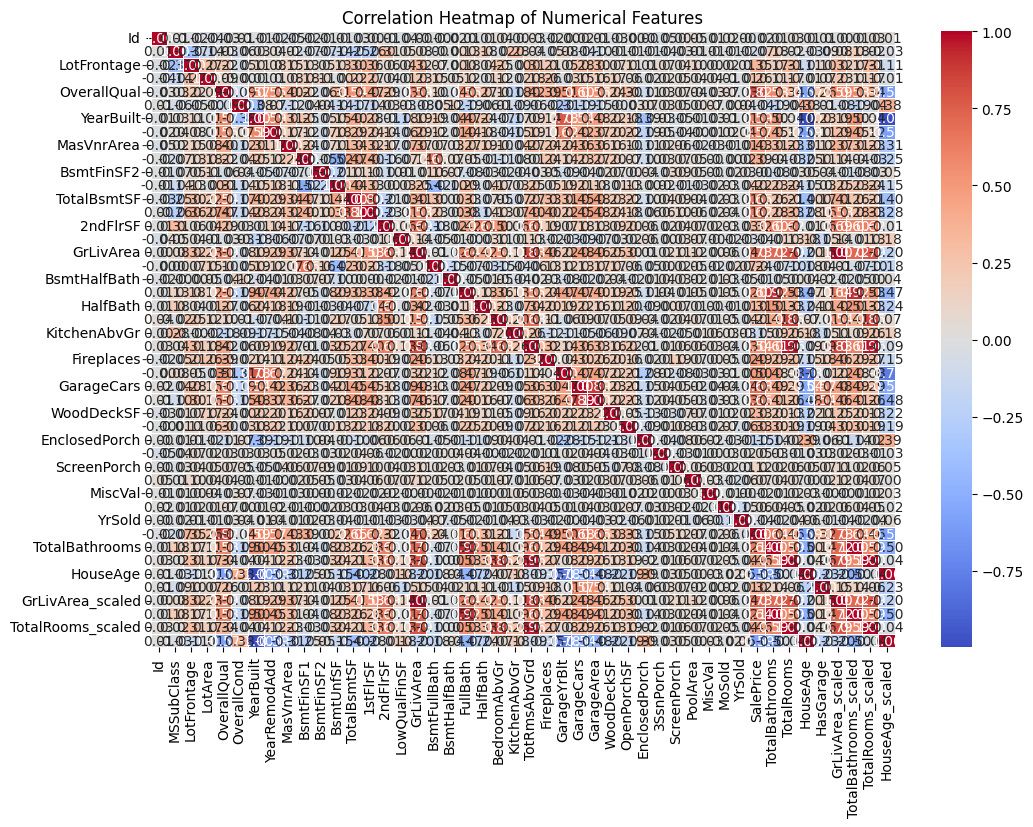

In [61]:
# Analyze Numerical Features
# Select only numerical features
numerical_data = train_data.select_dtypes(include=[np.number])

# Compute correlation with the target variable
correlation_with_target = numerical_data.corr()["SalePrice"].sort_values(ascending=False)

# Display correlation with target
print("Correlation of numerical features with SalePrice:")
print(correlation_with_target)

# Plot the correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(
    numerical_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [94]:
# Focus on top correlated features
correlation_with_target = train_data.drop(columns=["SalePrice"]).select_dtypes(include=np.number).corrwith(train_data["SalePrice"])
top_features = correlation_with_target[abs(correlation_with_target) > 0.5].index.tolist()
print("\nTop correlated features with SalePrice:")
print(top_features)


Top correlated features with SalePrice:
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBathrooms', 'HouseAge', 'GrLivArea_scaled', 'TotalBathrooms_scaled', 'HouseAge_scaled']


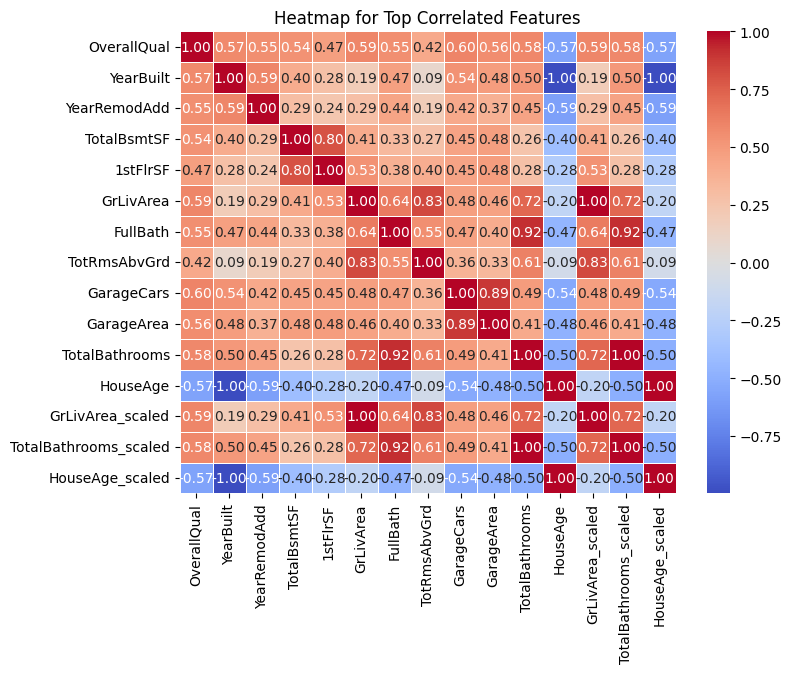

In [95]:
# Heatmap for Top Features
plt.figure(figsize=(8, 6))
sns.heatmap(
    numerical_data[top_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Heatmap for Top Correlated Features")
plt.show()

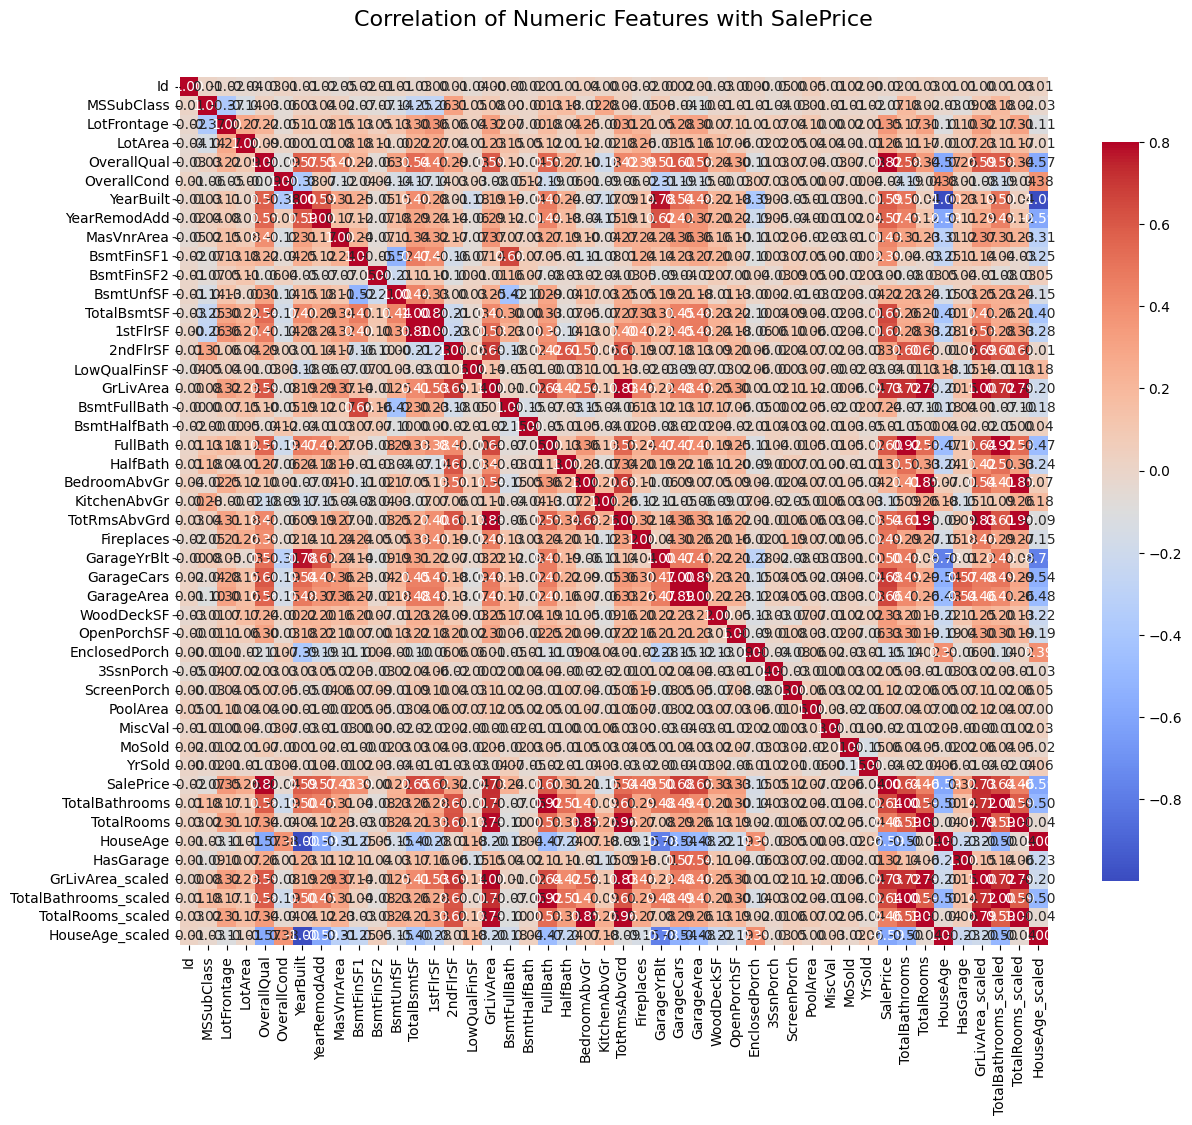

In [96]:
# Correlation Heatmap for All Features
fig, ax = plt.subplots(figsize=(14, 12))
plt.title("Correlation of Numeric Features with SalePrice", y=1.05, size=16)
sns.heatmap(
    numerical_data.corr(),
    square=True,
    vmax=0.8,
    annot=True,
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
    fmt=".2f"  # Format the correlation values to 2 decimal places
)
plt.show()

Top correlated features with SalePrice:
Index(['OverallQual', 'GrLivArea_scaled', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', 'TotalBathrooms', 'TotalBathrooms_scaled',
       '1stFlrSF', 'FullBath', 'HouseAge'],
      dtype='object')


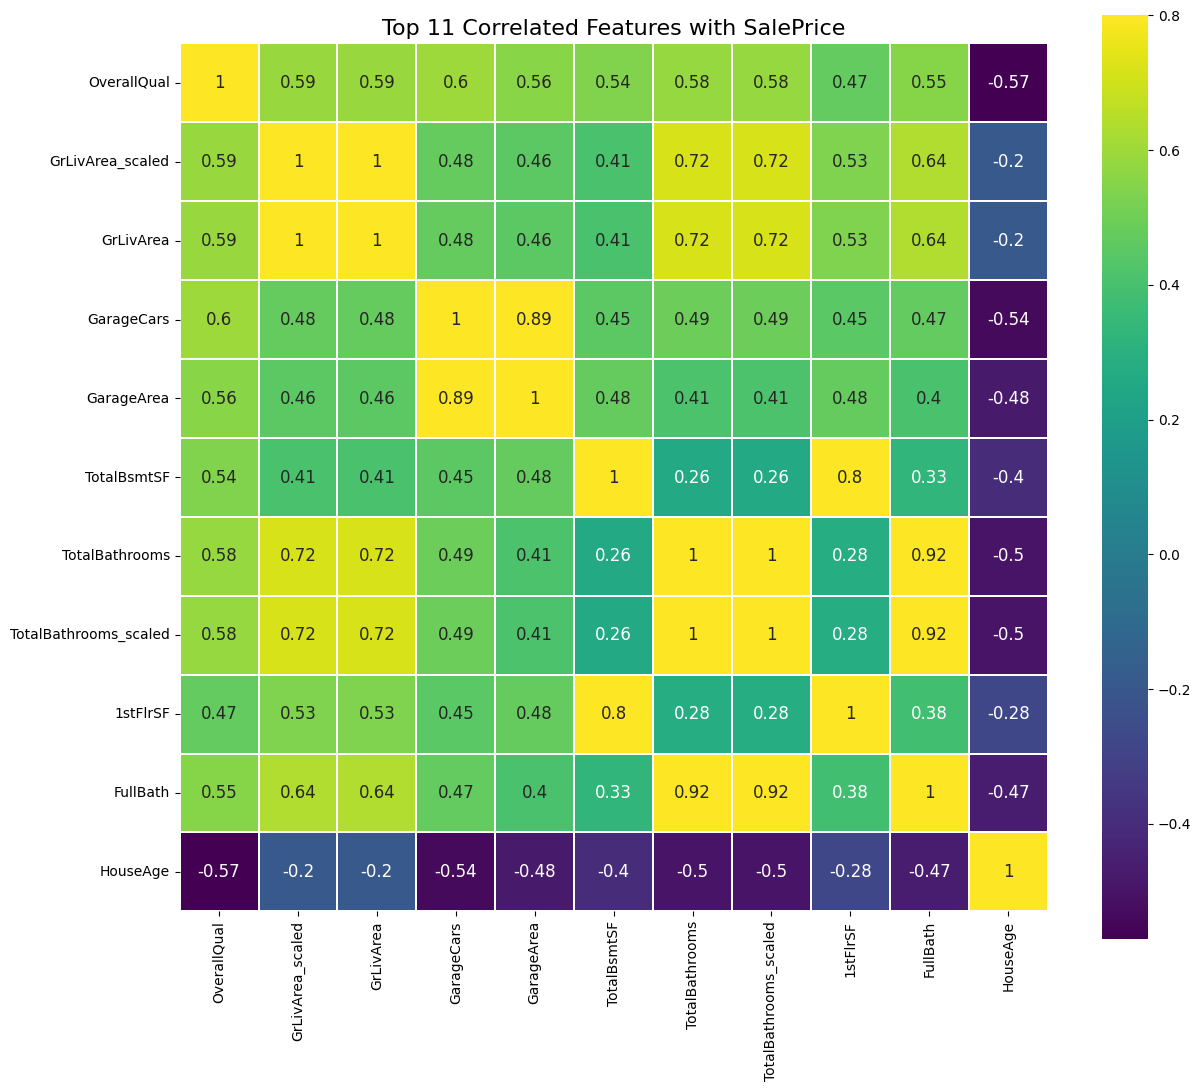

In [98]:
# Top 11 Correlated Features with SalePrice
k = 11
# Calculate correlation before dropping 'SalePrice'
correlation_with_target = numerical_data.corr()["SalePrice"]

# Drop 'SalePrice' from the correlation Series for feature selection
top_features = correlation_with_target.drop(labels=['SalePrice']).abs().nlargest(k).index
print("Top correlated features with SalePrice:")
print(top_features)

# Correlation Heatmap for Top Features
cm = np.corrcoef(numerical_data[top_features].values.T)
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(
    cm,
    vmax=0.8,
    linewidths=0.01,
    square=True,
    annot=True,
    cmap="viridis",
    linecolor="white",
    xticklabels=top_features,
    annot_kws={"size": 12},
    yticklabels=top_features
)
plt.title("Top 11 Correlated Features with SalePrice", size=16)
plt.show()

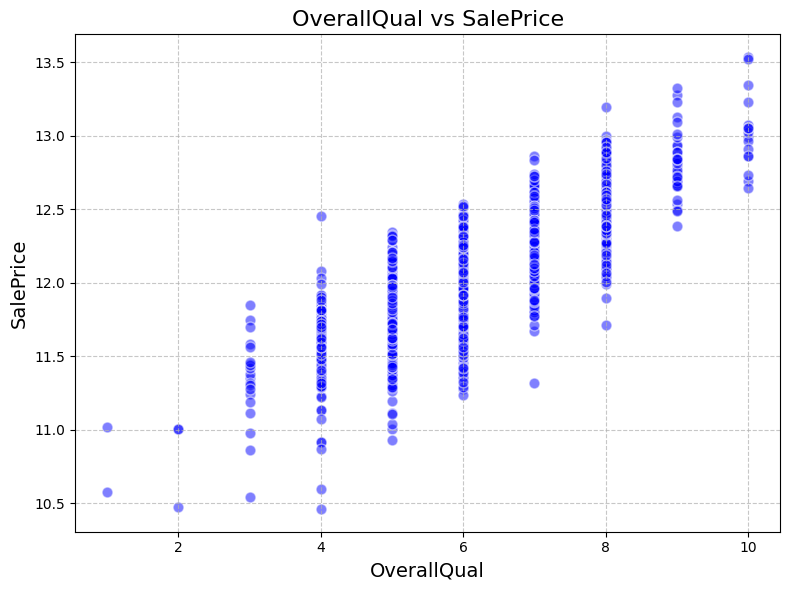

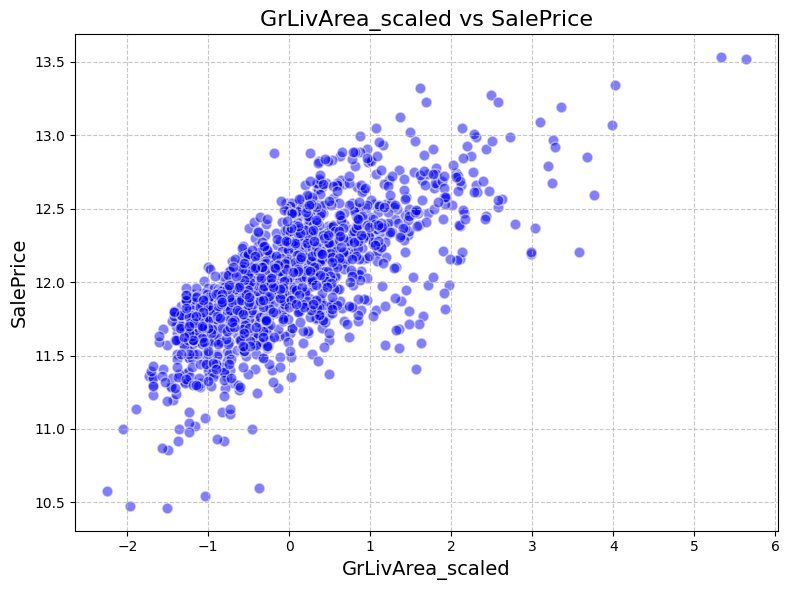

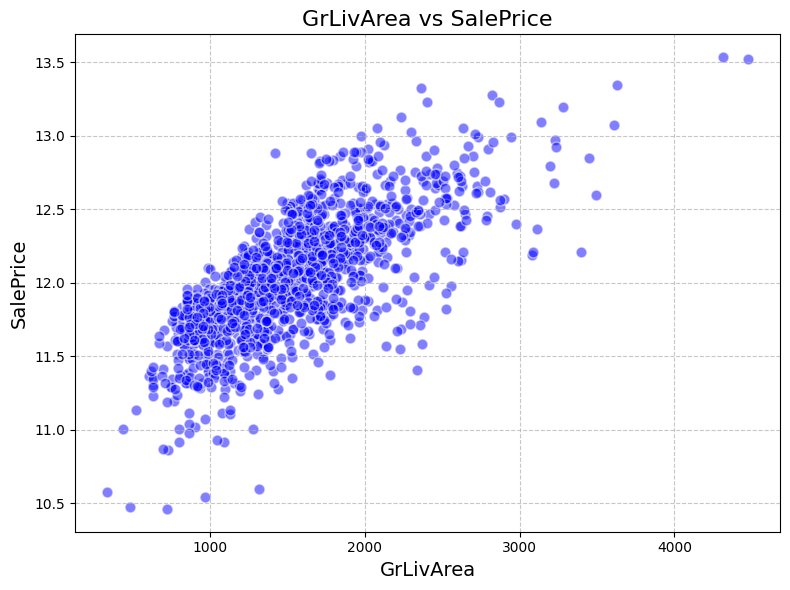

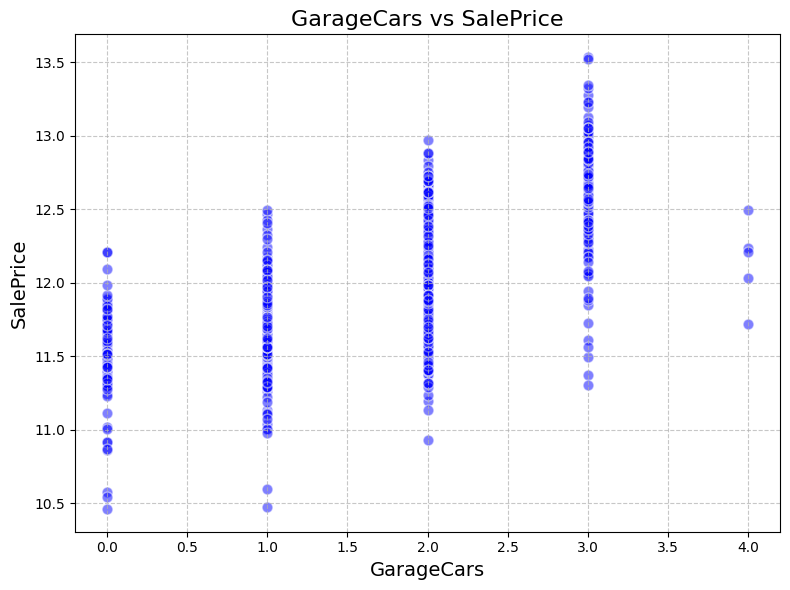

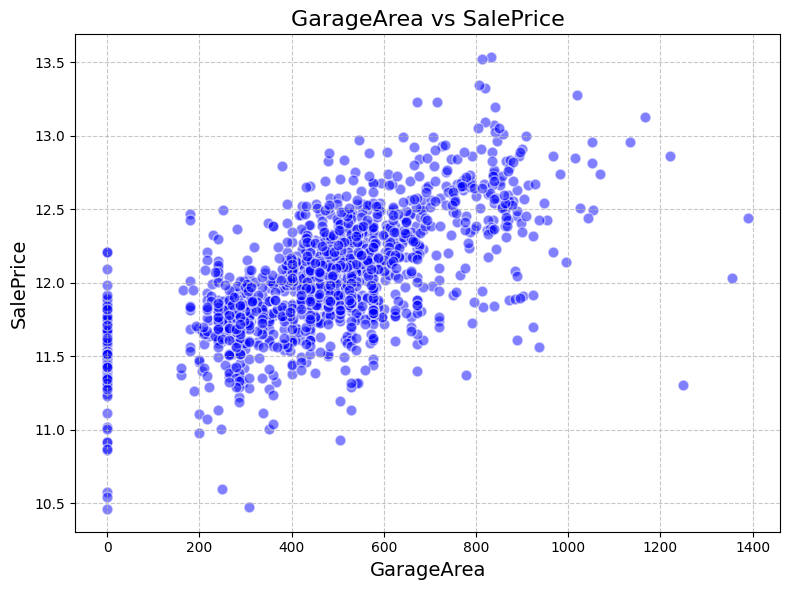

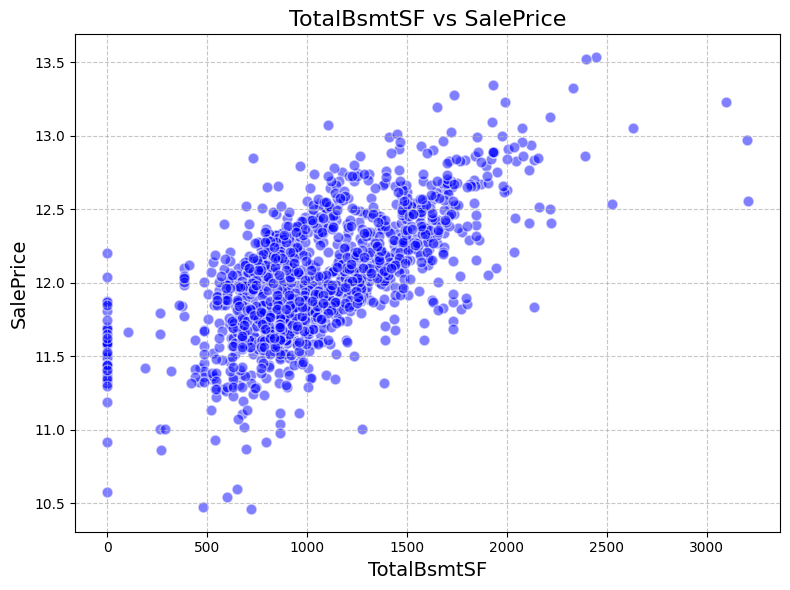

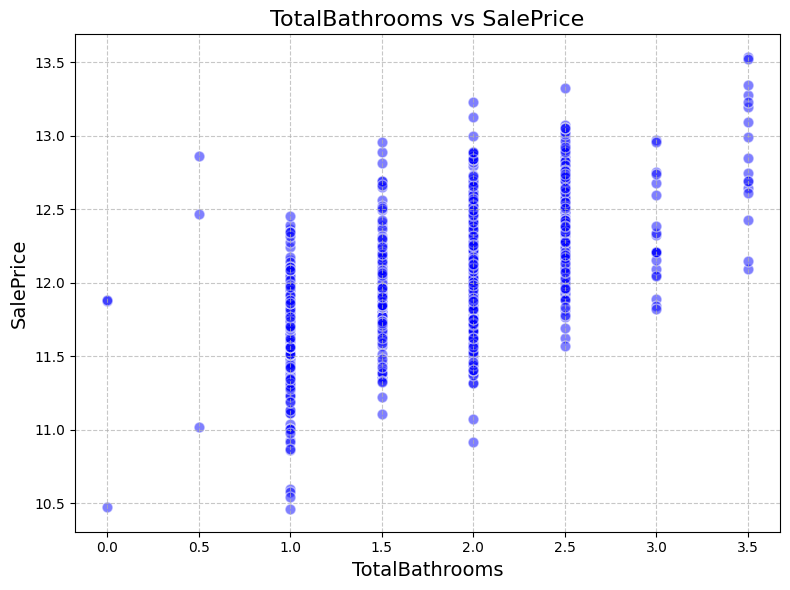

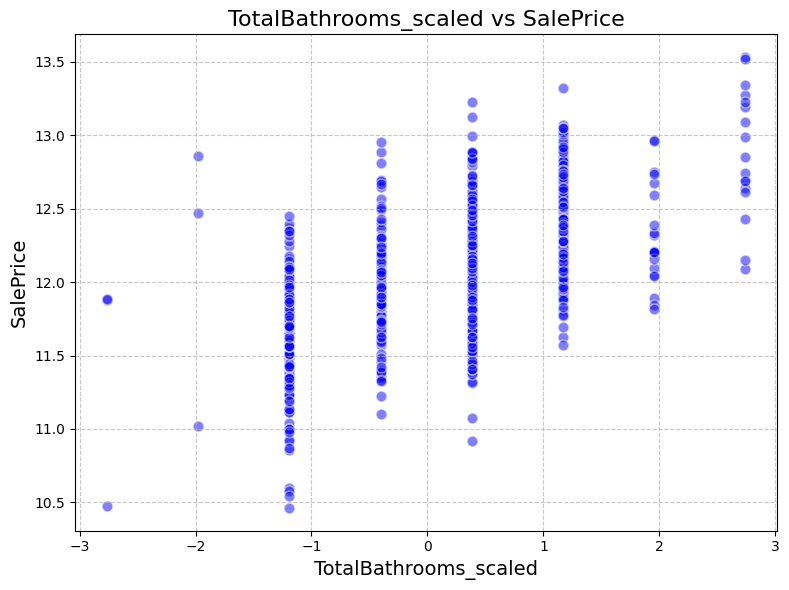

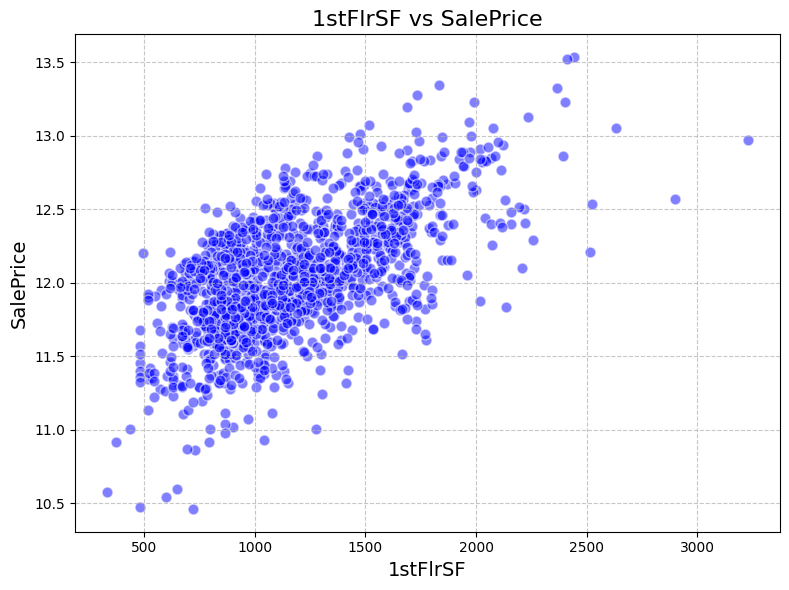

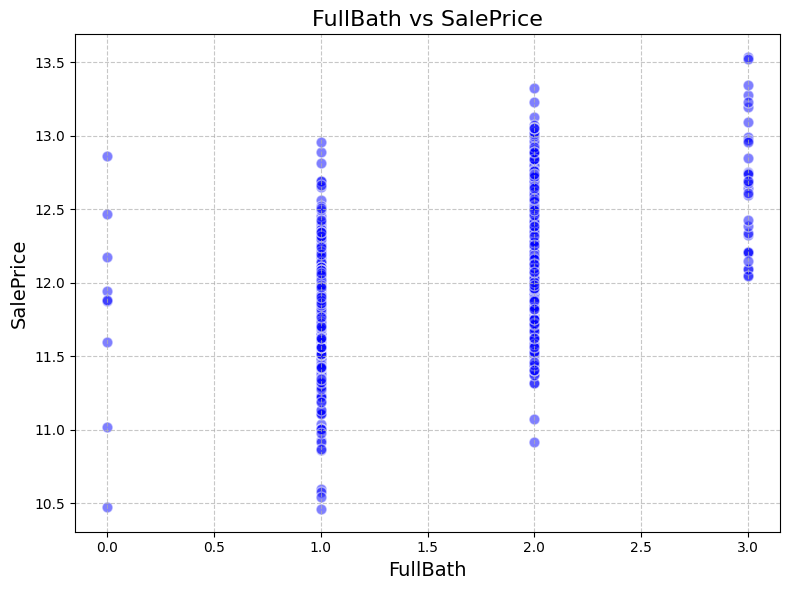

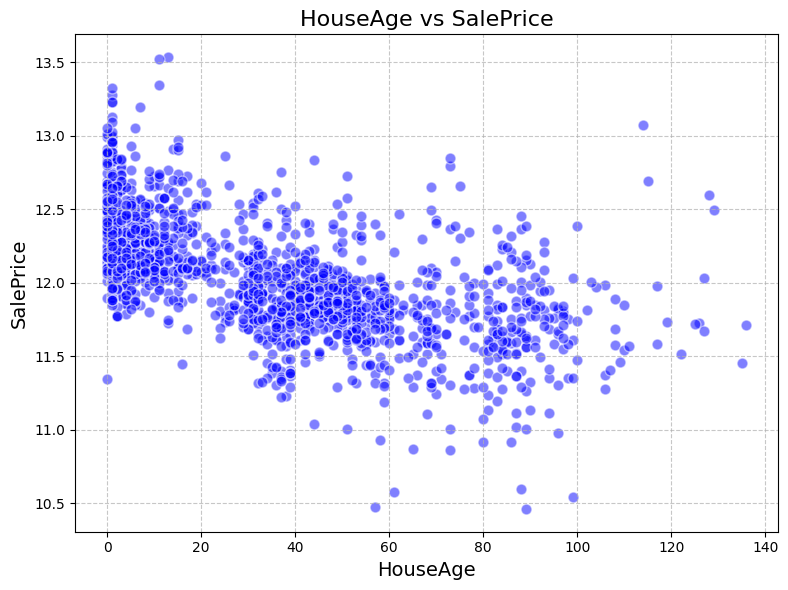

In [100]:
import matplotlib.pyplot as plt

# Ensure no missing values in top features or SalePrice
top_features = [feature for feature in top_features if feature in train_data.columns]
top_features = [feature for feature in top_features if train_data[feature].notnull().all()]

# Scatter Plots of Top Features with SalePrice
for feature in top_features:
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(train_data[feature], train_data["SalePrice"], alpha=0.5, color='blue', edgecolors='w', s=60)

    # Plot aesthetics
    plt.title(f"{feature} vs SalePrice", size=16)
    plt.xlabel(feature, size=14)
    plt.ylabel("SalePrice", size=14)
    plt.grid(True, linestyle='--', alpha=0.7)  # Optional: add grid with dashed lines for better readability
    plt.tight_layout()  # Ensures proper spacing

    plt.show()


### Analyze the Categorical Features

* **Distribution of Key Categorical Features** by Using count plots to understand categorical data.
* Explore how categorical features relate to `SalePrice` by using **Box Plots with Target Variable**

In [67]:
# Distribution of key categorical features
for feature in categorical_features:
    if train_data[feature].nunique() > 20:  # Example threshold
        print(f"{feature} has too many categories to plot.")
        continue
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train_data, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()

Neighborhood has too many categories to plot.


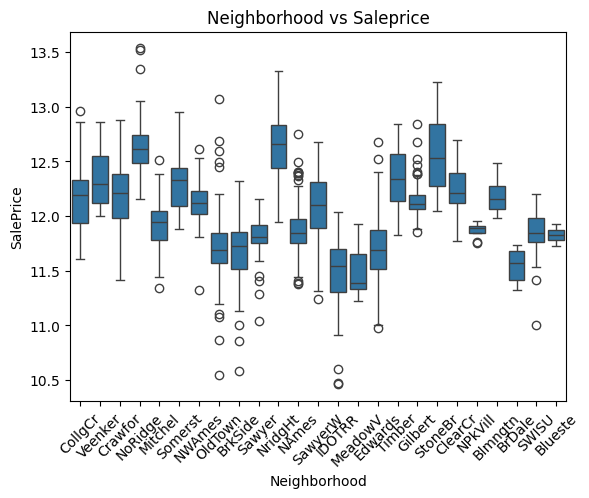

In [68]:
# Box plots with target variable.
for feature in categorical_features:
  sns.boxplot(data=train_data, x=feature, y="SalePrice")
  plt.title(f"{feature} vs Saleprice")
  plt.xticks(rotation=45)
  plt.show()

### Detect Outliers

It is important to detect outliers in data analysis and machine learning for several reasons:

* It improves model performance by reducing overfitting and enhancing accuracy.
* It ensures data quality and integrity by identifying errors and uncovering anomalies.
* Help make better and informed decisions


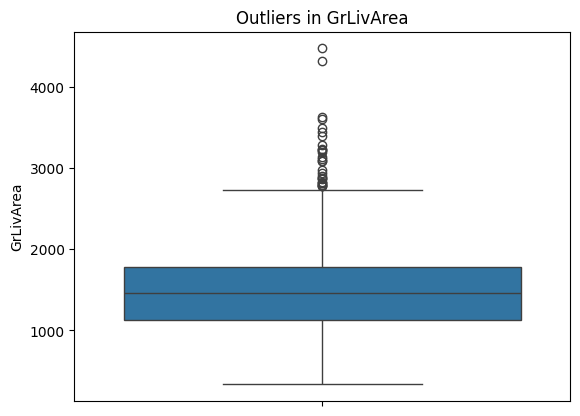

In [101]:
# identifying outliers in important numeriacal features using Boxplot analysis
sns.boxplot(train_data['GrLivArea'])
plt.title("Outliers in GrLivArea")
plt.show()


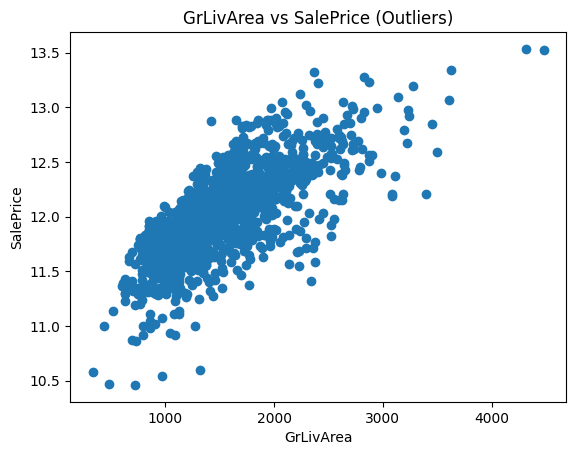

In [102]:
# verify outliers by looking at the key numerical features using Scatter Plot analysis
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'])
plt.title("GrLivArea vs SalePrice (Outliers)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


### Feature Integration

**Feature interaction** is a concept in machine learning where the combined effect of two or more features on the target variable is greater than the sum of their individual effects. In simpler terms, the impact of one feature depends on the value of another feature.

**Why is it important?**
* it improves model performance
* It ensures better understanding of data.
* It also enhance model interpretability

**Example:**
Consider a model predicting house prices. The features might include `square_feet` and `number_of_bedrooms`. While these features are individually important, their interaction might also be significant. For example, a large house with many bedrooms might be more valuable than a small house with the same number of bedrooms.

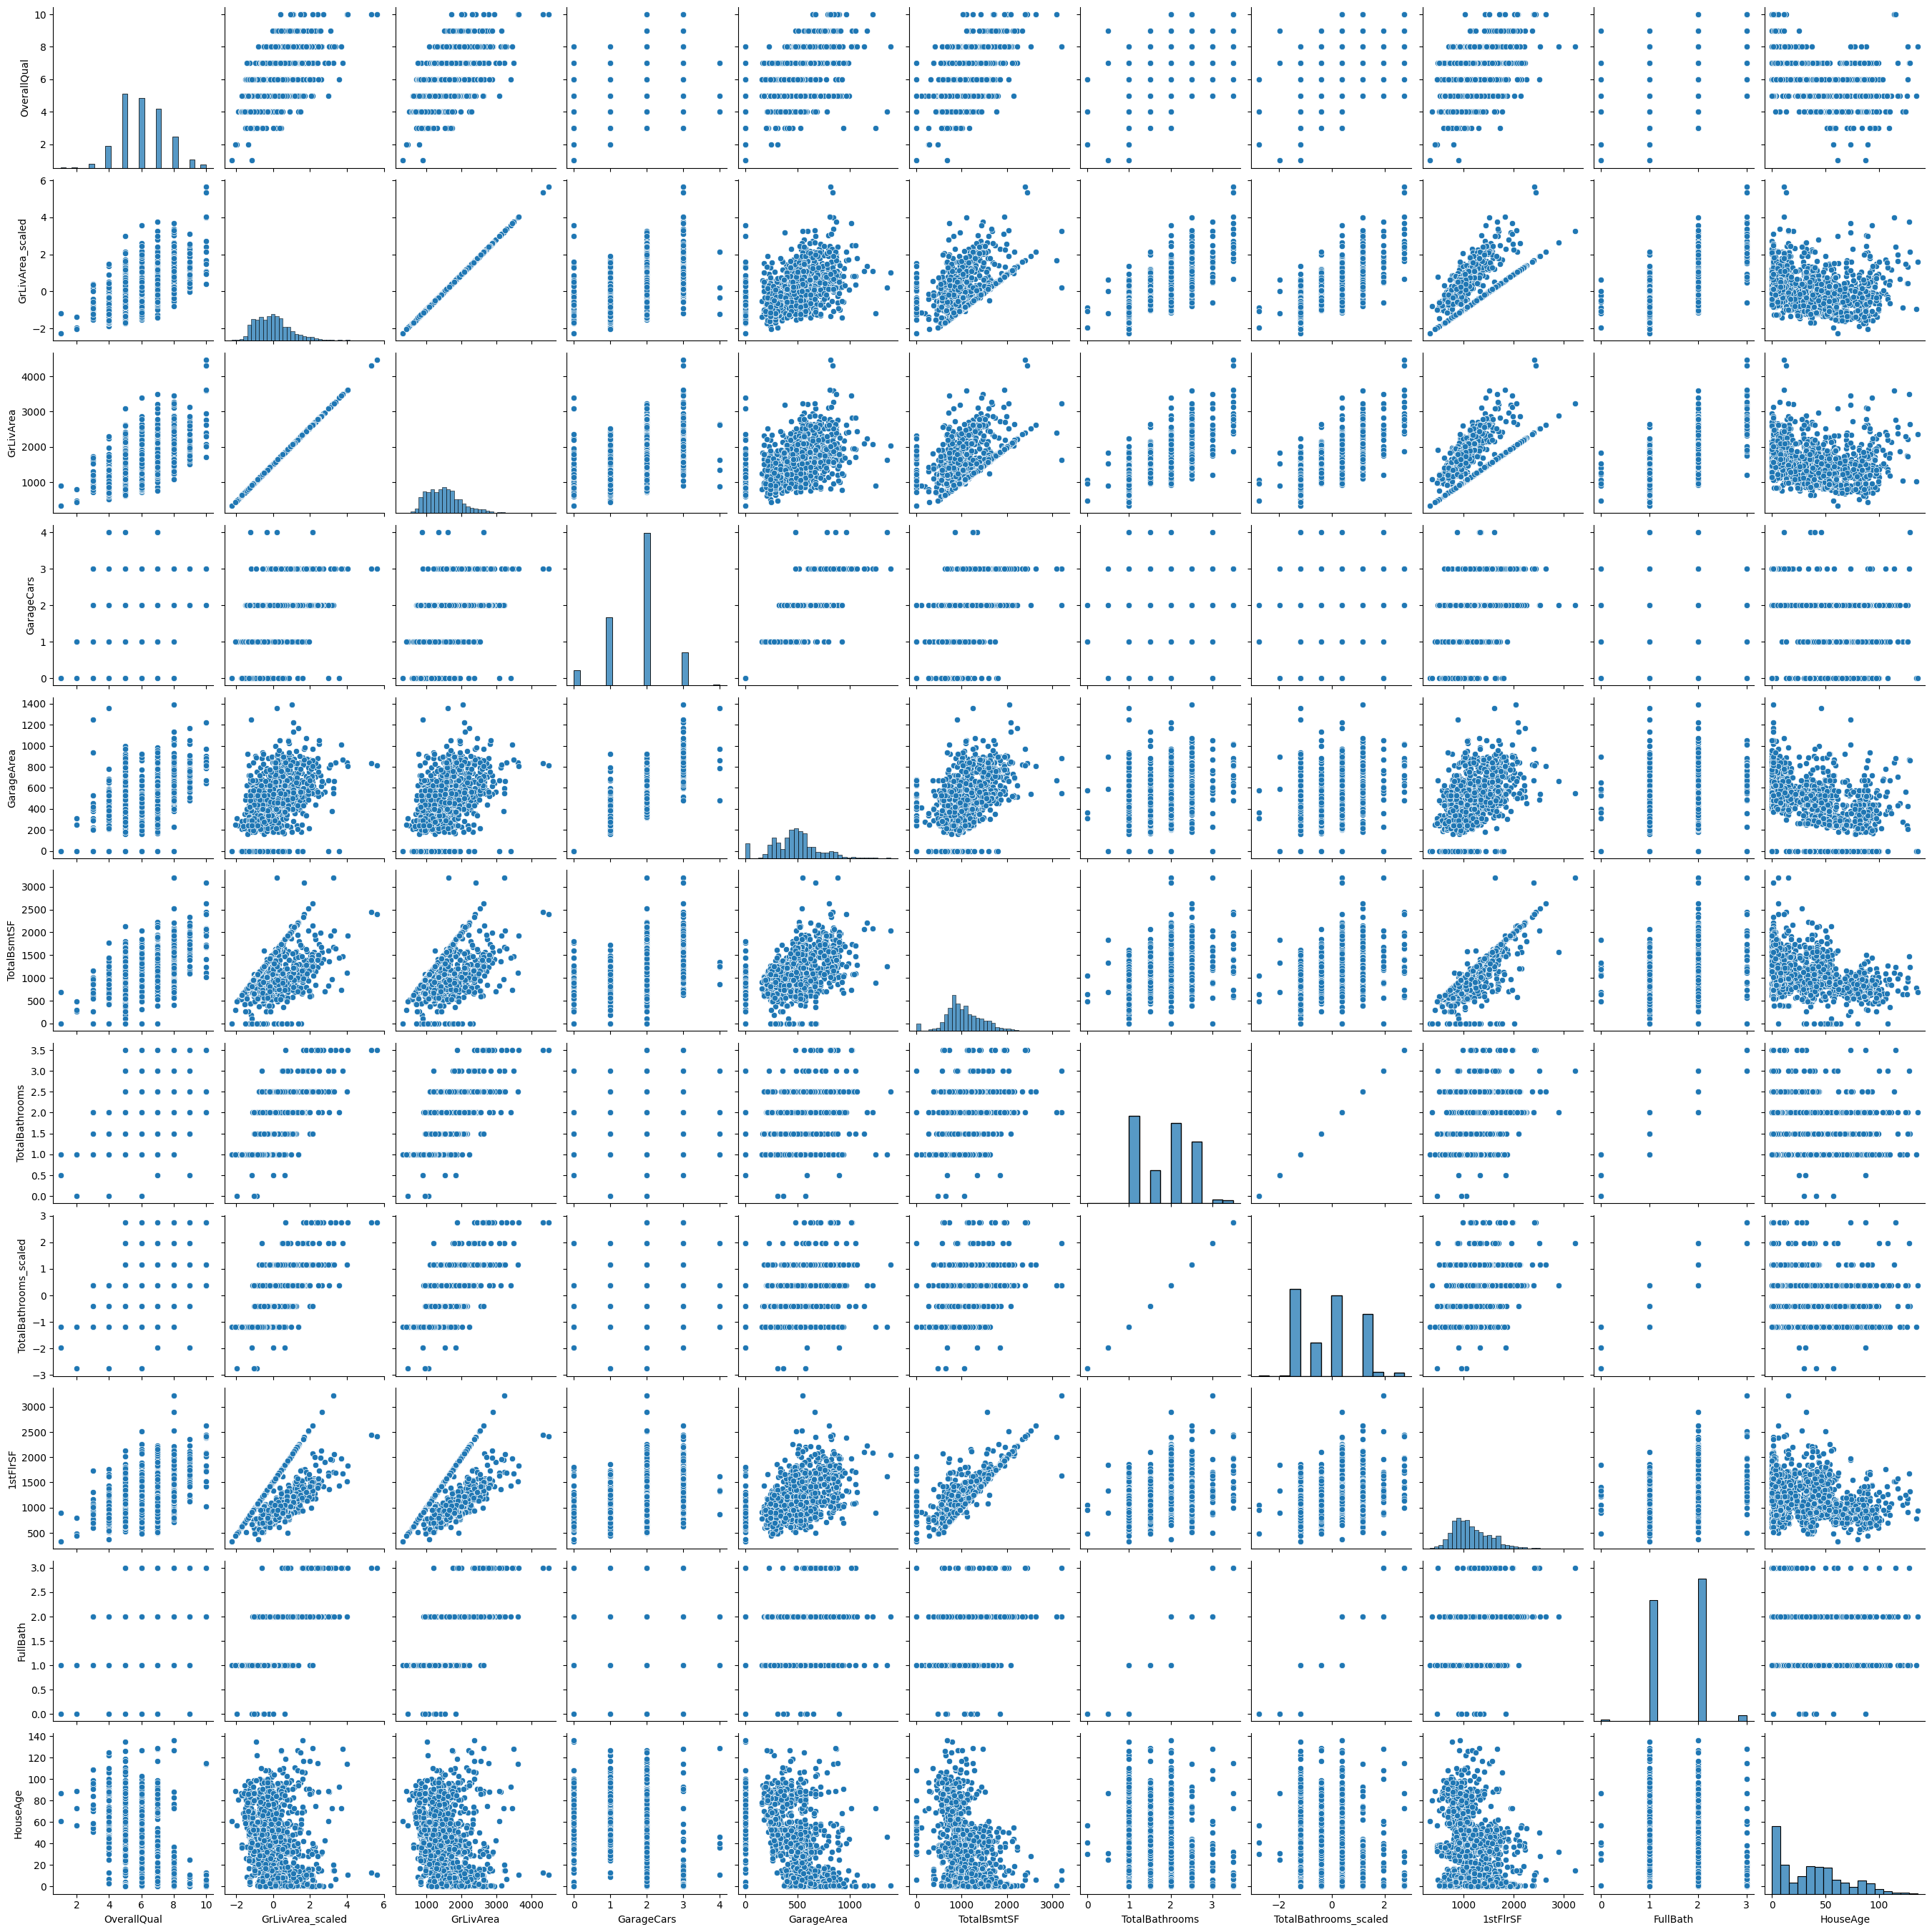

In [103]:
# Pairplot to visualize interactions between key features (Top correlated features with SalePrice)
sns.pairplot(train_data[top_features])  # Use the top_features dynamically selected
plt.show()


## Model Development

**Model development** is the core process in machine learning where we create and train algorithms to recognize patterns in data and make predictions or decisions.

In [107]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure that top_features does not contain the target variable 'SalePrice'
top_features = [feature for feature in top_features if feature != "SalePrice"]

# Define features and target based on the dynamically selected top features
top_features_with_target = list(top_features)  # Include dynamically selected top features
X = train_data[top_features_with_target]  # Use selected features for X (no need to exclude 'SalePrice' now)
y = train_data["SalePrice"]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Model Evaluation Metrics:")
print(f"RMSLE: {rmsle:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Output model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(top_features_with_target, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Intercept
print(f"Intercept: {model.intercept_:.4f}")


Model Evaluation Metrics:
RMSLE: 0.0129
RMSE: 0.16
R^2 Score: 0.8405

Model Coefficients:
OverallQual: 0.0891
GrLivArea_scaled: 0.0000
GrLivArea: 0.0003
GarageCars: 0.0316
GarageArea: 0.0002
TotalBsmtSF: 0.0002
TotalBathrooms: 0.0158
TotalBathrooms_scaled: 0.0248
1stFlrSF: 0.0000
FullBath: -0.0711
HouseAge: -0.0025
Intercept: 10.8863


In [108]:
# Check for highly correlated features with SalePrice
numeric_columns = train_data.select_dtypes(include=[np.number])

# Check for correlation with SalePrice
if "SalePrice" in numeric_columns.columns:
    print(numeric_columns.corr()['SalePrice'].sort_values(ascending=False))
else:
    print("SalePrice is not in the numeric columns.")

# Check for duplicate features
print(train_data.columns[train_data.columns.duplicated()])

# Confirm train-test split integrity
print(set(X_train.index).intersection(set(X_test.index)))

# Ensure no feature includes the target or derived information
print(train_data[features].head())
print(train_data["SalePrice"].head())


SalePrice                1.000000
OverallQual              0.821405
GrLivArea_scaled         0.725211
GrLivArea                0.725211
GarageCars               0.681033
GarageArea               0.656129
TotalBsmtSF              0.647563
TotalBathrooms           0.640891
TotalBathrooms_scaled    0.640891
1stFlrSF                 0.620500
FullBath                 0.595899
YearBuilt                0.587043
YearRemodAdd             0.565992
TotRmsAbvGrd             0.537702
GarageYrBlt              0.496179
Fireplaces               0.491998
TotalRooms               0.461549
TotalRooms_scaled        0.461549
MasVnrArea               0.430570
BsmtFinSF1               0.392283
LotFrontage              0.351551
WoodDeckSF               0.334251
OpenPorchSF              0.325215
HasGarage                0.322994
2ndFlrSF                 0.319953
HalfBath                 0.314186
LotArea                  0.260544
BsmtFullBath             0.237099
BsmtUnfSF                0.221892
BedroomAbvGr  

## Model Evaluation

**Model evaluation** is the process of assessing a machine learning model's performance on a given dataset. It helps us understand how well the model generalizes to new, unseen data and identifies its strengths and weaknesses.

 Let's perform **k-fold cross-validation** for the linear regression model and ensure its robustness, we will use the cross_val_score function from sklearn.model_selection. This method splits the dataset into k subsets (folds), trains the model on k-1 folds, and evaluates it on the remaining fold, rotating through all folds.

In [109]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_log_error, mean_squared_error, r2_score
import numpy as np

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
linear_regression = LinearRegression()

# Define RMSLE scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Perform cross-validation for RMSLE
rmsle_scores = -cross_val_score(linear_regression, X, y, cv=kf, scoring=rmsle_scorer)

# Perform cross-validation for RMSE
rmse_scores = np.sqrt(-cross_val_score(linear_regression, X, y, cv=kf, scoring='neg_mean_squared_error'))

# Perform cross-validation for R²
r2_scores = cross_val_score(linear_regression, X, y, cv=kf, scoring='r2')

# Display RMSLE results
print(f"RMSLE scores across folds: {rmsle_scores}")
print(f"Mean RMSLE: {rmsle_scores.mean():.4f}")
print(f"Standard Deviation of RMSLE: {rmsle_scores.std():.4f}")

# Display RMSE results
print(f"\nRMSE scores across folds: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.4f}")

# Display R² results
print(f"\nR² scores across folds: {r2_scores}")
print(f"Mean R²: {r2_scores.mean():.4f}")
print(f"Standard Deviation of R²: {r2_scores.std():.4f}")


RMSLE scores across folds: [0.01285174 0.01157561 0.01297302 0.01208309 0.01110113]
Mean RMSLE: 0.0121
Standard Deviation of RMSLE: 0.0007

RMSE scores across folds: [0.16394997 0.1486905  0.1673637  0.1540311  0.14414287]
Mean RMSE: 0.1556
Standard Deviation of RMSE: 0.0088

R² scores across folds: [0.84054936 0.85357967 0.80682204 0.86958739 0.86285172]
Mean R²: 0.8467
Standard Deviation of R²: 0.0222


**Evaluation**

The results indicate that the model generalizes well to unseen data without overfitting.
RMSLE values below 0.02 are excellent, especially for a linear regression model, which is inherently simpler than more complex models like gradient boosting or neural networks.

## Model Optimization

**Model optimization** is the process of refining a machine learning model to achieve the best possible performance. It involves various techniques to improve accuracy, speed, and efficiency.


### Fine-Tuning Model Hyperparameters using Grid Search

**Hyperparameter tuning** refines the model's performance by systematically testing parameter combinations to find the optimal configuration.

**Steps to Implement Grid Search**

* **Define the Range of Hyperparameters:** Choose values to test for hyperparameters, such as
α for Ridge and Lasso regression.
* **Use GridSearchCV:** Perform exhaustive search across specified hyperparameters using cross-validation to ensure robustness.

In [110]:
import pandas as pd

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)



In [111]:
print(X_train.dtypes)

OverallQual                int64
GrLivArea_scaled         float64
GrLivArea                  int64
GarageCars                 int64
GarageArea                 int64
TotalBsmtSF                int64
TotalBathrooms           float64
TotalBathrooms_scaled    float64
1stFlrSF                   int64
FullBath                   int64
HouseAge                   int64
dtype: object


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define RMSLE scorer for optimization
def rmsle(y_true, y_pred):
    if np.any(y_true <= 0) or np.any(y_pred <= 0):
        raise ValueError("RMSLE cannot be computed for non-positive values.")
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Check data validity
print(f"Min value in y_train: {y_train.min()}")
if y_train.min() <= 0:
    raise ValueError("y_train contains non-positive values. Log transformation is invalid.")

# Define parameter grid for Ridge and Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Ridge Regression with Grid Search
ridge = Ridge()
try:
    ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring=rmsle_scorer)
    ridge_grid.fit(X_train, y_train)
    best_ridge_alpha = ridge_grid.best_params_['alpha']
    best_ridge_rmsle = (-ridge_grid.best_score_) ** 0.5
    print("Best Ridge alpha:", best_ridge_alpha)
    print("Best Ridge RMSLE:", best_ridge_rmsle)
except ValueError as e:
    print(f"Error during Ridge GridSearchCV: {e}")

# Lasso Regression with Grid Search
lasso = Lasso(max_iter=10000)
try:
    lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring=rmsle_scorer)
    lasso_grid.fit(X_train, y_train)
    best_lasso_alpha = lasso_grid.best_params_['alpha']
    best_lasso_rmsle = (-lasso_grid.best_score_) ** 0.5
    print("Best Lasso alpha:", best_lasso_alpha)
    print("Best Lasso RMSLE:", best_lasso_rmsle)
except ValueError as e:
    print(f"Error during Lasso GridSearchCV: {e}")


Min value in y_train: 10.460270761075149
Best Ridge alpha: 1
Best Ridge RMSLE: 0.10939023362730077
Best Lasso alpha: 0.001
Best Lasso RMSLE: 0.10949660015472222


### Experimenting with Scaling Techniques

Feature scaling ensures that all input features contribute equally to the model's predictions, particularly for regularization techniques like Ridge and Lasso.

**Common Scaling Methods**
* **StandardScaler:** Centers data (mean = 0) and scales to unit variance.
* **MinMaxScaler:** Scales features to a range (e.g., [0, 1]).

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling (StandardScaler for standardization)
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Test with MinMaxScaler (normalization)
X_train_scaled_minmax = minmax_scaler.fit_transform(X_train)
X_test_scaled_minmax = minmax_scaler.transform(X_test)

In [115]:
# Inpecting the scaled data
print("Mean of Standard Scaled Data (X_train):", X_train_scaled.mean(axis=0))
print("Standard Deviation of Standard Scaled Data (X_train):", X_train_scaled.std(axis=0))
print("Range of Min-Max Scaled Data (X_train):", X_train_scaled_minmax.min(axis=0), "-", X_train_scaled_minmax.max(axis=0))


Mean of Standard Scaled Data (X_train): [-2.13284698e-16 -1.90432766e-18  1.30256012e-16  6.55088714e-17
 -2.58988561e-17  4.72273259e-17  1.34064667e-16  3.80865532e-17
  3.73248221e-17  2.28519319e-17 -4.26569395e-17]
Standard Deviation of Standard Scaled Data (X_train): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Range of Min-Max Scaled Data (X_train): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] - [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [116]:
# Compare Before and After
print("Original Data Sample:", X_train[:5])
print("Standard Scaled Data Sample:", X_train_scaled[:5])
print("Min-Max Scaled Data Sample:", X_train_scaled_minmax[:5])


Original Data Sample:       OverallQual  GrLivArea_scaled  GrLivArea  GarageCars  GarageArea  \
254             5         -0.383521       1314           1         294   
1066            6          0.105723       1571           2         380   
865             5         -0.977467       1002           2         902   
799             5          0.480746       1768           1         240   
380             5          0.334164       1691           1         308   

      TotalBsmtSF  TotalBathrooms  TotalBathrooms_scaled  1stFlrSF  FullBath  \
254          1314             1.0              -1.189855      1314         1   
1066          799             2.5               1.169387       799         2   
865          1002             1.0              -1.189855      1002         1   
799           731             1.5              -0.403441       981         1   
380          1026             2.0               0.382973      1026         2   

      HouseAge  
254         53  
1066        16  
8

## Saving file for submission

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create a pipeline with preprocessing, imputation, and model training steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('model', model)  # Train the model
])

# Split the dataset into training and testing sets
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(
    train_data[selected_features],  # Use original data with selected features
    train_data["SalePrice"],
    test_size=0.2,
    random_state=42
)

# Fit the pipeline to the training data
pipeline.fit(X_train_prep, y_train_prep)

# Make predictions on the test data
y_pred = pipeline.predict(test_data[selected_features])

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': np.expm1(y_pred)  # Reverse log transformation
})

# Save the submission file
submission.to_csv("/content/drive/MyDrive/prodigy_infotech_internship/house_price_predictions_submission.csv", index=False)